<a href="https://colab.research.google.com/github/Eric-Mendes/conta-stone-data-challenge/blob/main/data_analyses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Intern Challenge**

In [23]:
# Importing the standard libraries for data analysis
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Creating dataframes for each dataset
card_url = "https://gist.githubusercontent.com/caiotaniguchi/\
8b5ee7dc75c8b6426222942ced90c4c1/raw/39ca0f8b442068aaffed35e26f0ce7f76faf1c63/\
dataset-cards.csv"

customers_url = "https://gist.githubusercontent.com/caiotaniguchi/\
8b5ee7dc75c8b6426222942ced90c4c1/raw/39ca0f8b442068aaffed35e26f0ce7f76faf1c63/\
dataset-customers.csv"

fraud_url = "https://gist.githubusercontent.com/caiotaniguchi/\
8b5ee7dc75c8b6426222942ced90c4c1/raw/39ca0f8b442068aaffed35e26f0ce7f76faf1c63\
/dataset-frauds.csv"

transactions_url = "https://gist.githubusercontent.com/caiotaniguchi/\
8b5ee7dc75c8b6426222942ced90c4c1/raw/39ca0f8b442068aaffed35e26f0ce7f76faf1c63/\
dataset-transactions.csv"


df_card = pd.read_csv(card_url, sep=';')

df_customers = pd.read_csv(customers_url, sep=';')

df_fraud = pd.read_csv(fraud_url, sep=';')

df_transactions = pd.read_csv(transactions_url, sep=';')



1.   *Extract and analyze the data in order to answer the following questions. Provide a description and/or comments for each solution.*



In [3]:
# AVERAGE AGE OF THE CUSTOMERS IN THE DATABASE

# getting the column age and turning it into a numpy array
age = np.array(df_customers['age']) 

# getting the average age
avg_age = age.mean()
# printing the average age rounded to two decimal places
print("The average age of the customers in the database is {} years old."\
      .format(round(avg_age, 2)))

The average age of the customers in the database is 35.06 years old.


*How is the card_family ranked based on the credit_limit given to each card?*

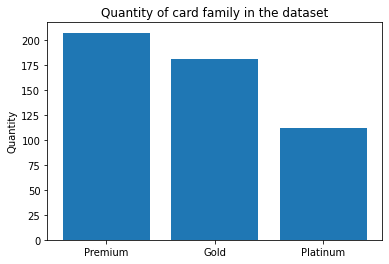

In [4]:
# getting all the card families in the dataset
card_families = np.unique(df_card['card_family'])

# getting the quantity of each card family in the dataset
family_quantity = [(family, df_card['card_family'].loc\
                    [df_card.card_family == family]\
                   .count()) for family in card_families]

# sorting in place by quantity (descending order)
family_quantity.sort(key=lambda qty: qty[1], reverse=True)

# unzipping family_quantity (separating family from quantity)
family_quantity = zip(*family_quantity)
family_quantity = list(family_quantity)

# plotting the family quantity
plt.bar(family_quantity[0], family_quantity[1])
plt.title("Quantity of card family in the dataset")
plt.ylabel("Quantity")
plt.show()

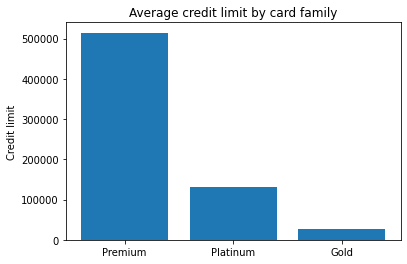

In [5]:
# getting the average credit limit for each card family in the dataset
avg_credit_limit = [(family, np.array(df_card['credit_limit'].loc\
                                      [df_card.card_family == family]).mean())\
                     for family in card_families]

# sorting in place by credit_limit (descending order)
avg_credit_limit.sort(key=lambda family_credit_limit: family_credit_limit[1], \
                      reverse=True)

# unzipping avg_credit_limit
avg_credit_limit = zip(*avg_credit_limit)
avg_credit_limit = list(avg_credit_limit)

# plotting the average credit limit
plt.bar(avg_credit_limit[0], avg_credit_limit[1])
plt.title("Average credit limit by card family")
plt.ylabel("Credit limit")
plt.show()